**IFSP - Campus Campinas** <br>
**Pós-graduação em Ciência de Dados** <br>

**TCC - Avaliação de Projetos de Lei usando técnicas de NLP/ML**

#### Sprint 1 - v 1.1 
- pre-processamento com Spacy seguido de Neattext
- feature extraction com TfidfVectorizer na coluna 'Texto' da PLO
- treinamento com LogisticRegression
- rodado em PC local (não AWS)


Ref:  Natural Language Processing (NLP) 2023.1 - IFSP Campinas <br>
https://github.com/prof-samuka-IFSP/IFSP-CMP-D3TOP-2023.1/tree/main

Orientadora: Bianca Maria Pedrosa - IFSP Campinas<br>
Aluno: Swift Motoo Yaguchi - CP301665X

------

### 1. Etapa de limpeza e pré-processamento

##### Instalando bibliotecas

In [1]:
#Upgrade dependencies
#!pip install --upgrade pip
#!pip install --upgrade scikit-learn
!pip install --upgrade wordcloud
#!pip install --upgrade sagemaker

In [2]:
#pip install scikit-learn==0.24.2

In [3]:
import pandas as pd
import numpy as np

##### Leitura da base de dados

In [4]:
df = pd.read_csv('PLO_2019_v5.csv', sep=';')
df.head()

,Vereador,Partido,Aprovado,Ementa,Texto
0,Ailton da Farmácia,PSD,sim,DECLARA ÓRGÃO DE UTILIDADE PÚBLICA MUNICIPAL A...,Art. I Q Fica declarada órgão de utilidade púb...
1,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ZILDA MELLO SMILGYS UMA PRAÇA P...,Art. I P Fica denominada Praça Zilda Mello Smi...
2,Ailton da Farmácia,PSD,sim,DENOMINA RUA JOSÉ LATARO UMA VIA PÚBLICA DO MU...,Art. 10 Fica denominada Rua José Lataro a Rua ...
3,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ROBERTO ANGELO CASTELLO UMA ÁRE...,Art. 1 0 Fica denominada Praça Roberto Angelo ...
4,Ailton da Farmácia,PSD,não,DISPÕE SOBRE A GRATUIDADE POR ATÉ DUAS HORAS D...,Art. 1 0 Institui a gratuidade por até duas ho...


In [5]:
# É possível alterar as opções na atividade para exibir mais dados de texto.
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)
df.head()

,Vereador,Partido,Aprovado,Ementa,Texto
0,Ailton da Farmácia,PSD,sim,DECLARA ÓRGÃO DE UTILIDADE PÚBLICA MUNICIPAL A ADRA - NÚCLEO PROFA. CÁSSIA RODRIGUES LASCA.,"Art. I Q Fica declarada órgão de utilidade pública municipal a ADRA — Núcleo Profa. Cássia Rodrigues Lasca, situada no município de Campinas e inscrita no Cadastro Nacional da Pessoa Jurídica - CNP] sob o número 15.355.260/0025-24."
1,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ZILDA MELLO SMILGYS UMA PRAÇA PÚBLICA DO MUNICÍPIO DE CAMPINAS.,"Art. I P Fica denominada Praça Zilda Mello Smilgys a Praça 09 (Quarteirão 16.703, Código\nCartográfico 3441.5461.0001, com área de 560,00m 2 ) do loteamento Jardim dos Oliveiras — 3? Parte, situada entre a Rua Luiz Mariano Bueno (Rua 12) e a Rua Waldormiro Gonzaga Silva (Rua 14), no mesmo loteamento."
2,Ailton da Farmácia,PSD,sim,DENOMINA RUA JOSÉ LATARO UMA VIA PÚBLICA DO MUNICÍPIO DE CAMPINAS.,"Art. 10 Fica denominada Rua José Lataro a Rua 01 do Io eamento Parque Residencial Caiapó, com início na divisa do loteamento com o Jardim Carlos Lourenço, junto à Rua Monsenhor Antonio Mariano da Silva Cam rgo, e término na Avenida das Andorinhas, junto à divisa do Jardim Itayú"
3,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ROBERTO ANGELO CASTELLO UMA ÁREA PÚBLICA DO MUNICÍPIO DE CAMPINAS.,"Art. 1 0 Fica denominada Praça Roberto Angelo Castello a ár a pertencente ao Quarteirão 10.841 (formada pelo remanescente da Praça 01 0 loteamento Vila Alberto Simões, de Código Cartográfico 3442.4121.0040, e pelo remanescente da\nPraça 01 do loteamento Vila Antônio Francisco, de Cófjigo Cartográfico 3442.4121.0158), situada entre a Rua Júlio Pereira Brum, a Rua Piccolotto, a Rua Antonieta Quattrer Serra e via sem designação, em ambos os loteamentos."
4,Ailton da Farmácia,PSD,não,DISPÕE SOBRE A GRATUIDADE POR ATÉ DUAS HORAS DE ESTACIONAMENTO NOS ESPAÇOS PÚBLICOS DO MUNICÍPIO CONCEDIDOS OU NÃO À INCIATIVA PRIVADA ÀS PESSOAS COM 60 ANOS OU MAIS E AOS DEFICIENTES.,"Art. 1 0 Institui a gratuidade por até duas horas de estacionamento nos espaços públicos do município de Campinas, concedidos ou não à iniciativa privada por tempo determinado, às pessoas com 60 anos ou mais e aos deficientes.\nParágrafo Único A gratuidade de que trata o caput será concedida mediante a apresentação da credencial de estacionamento para vagas especiais emitida exclusivamente pela Empresa Municipal de Desenvolvimento de Campinas - EMDEC.\nArt. 20 A demarcação das vagas de estacionamento exclusivas para idosos a partir dos 60 anos será de responsabilidade do órgão municipal no espaço público adequado ou àquele concedido à iniciativa privada.\nArt. 30 Idosos e deficientes poderão estacionar em vagas comuns em caso de as demarcadas estarem ocupadas.\nArt 40 As despesas decorrentes da execução desta Lei ocorrerão por conta de dotações orçamentárias próprias, suplementadas se necessário."


In [6]:
# É possível alterar as opções na atividade para exibir mais dados de texto.
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)
# Exiba o DataFrame resultante
df.iloc[3:5]

,Vereador,Partido,Aprovado,Ementa,Texto
3,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ROBERTO ANGELO CASTELLO UMA ÁREA PÚBLICA DO MUNICÍPIO DE CAMPINAS.,"Art. 1 0 Fica denominada Praça Roberto Angelo Castello a ár a pertencente ao Quarteirão 10.841 (formada pelo remanescente da Praça 01 0 loteamento Vila Alberto Simões, de Código Cartográfico 3442.4121.0040, e pelo remanescente da\nPraça 01 do loteamento Vila Antônio Francisco, de Cófjigo Cartográfico 3442.4121.0158), situada entre a Rua Júlio Pereira Brum, a Rua Piccolotto, a Rua Antonieta Quattrer Serra e via sem designação, em ambos os loteamentos."
4,Ailton da Farmácia,PSD,não,DISPÕE SOBRE A GRATUIDADE POR ATÉ DUAS HORAS DE ESTACIONAMENTO NOS ESPAÇOS PÚBLICOS DO MUNICÍPIO CONCEDIDOS OU NÃO À INCIATIVA PRIVADA ÀS PESSOAS COM 60 ANOS OU MAIS E AOS DEFICIENTES.,"Art. 1 0 Institui a gratuidade por até duas horas de estacionamento nos espaços públicos do município de Campinas, concedidos ou não à iniciativa privada por tempo determinado, às pessoas com 60 anos ou mais e aos deficientes.\nParágrafo Único A gratuidade de que trata o caput será concedida mediante a apresentação da credencial de estacionamento para vagas especiais emitida exclusivamente pela Empresa Municipal de Desenvolvimento de Campinas - EMDEC.\nArt. 20 A demarcação das vagas de estacionamento exclusivas para idosos a partir dos 60 anos será de responsabilidade do órgão municipal no espaço público adequado ou àquele concedido à iniciativa privada.\nArt. 30 Idosos e deficientes poderão estacionar em vagas comuns em caso de as demarcadas estarem ocupadas.\nArt 40 As despesas decorrentes da execução desta Lei ocorrerão por conta de dotações orçamentárias próprias, suplementadas se necessário."


#### Realização da análise exploratória de dados

In [7]:
df.dtypes

Vereador    object
Partido     object
Aprovado    object
Ementa      object
Texto       object
dtype: object

In [8]:
print('O tamanho do dataset é:', df.shape)

O tamanho do dataset é: (370, 5)


In [9]:
df['Aprovado'].value_counts()

Aprovado
não    189
sim    181
Name: count, dtype: int64

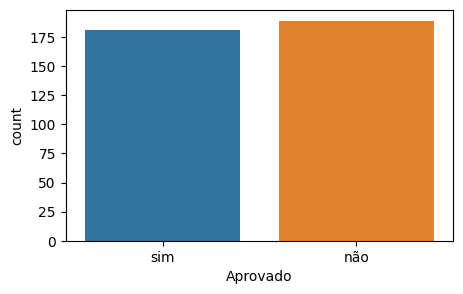

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Aprovado')
plt.show()

Nota-se que o resultado é bem balanceado

In [11]:
# Verificando se base de dados tem valores ausentes
df.isna().sum()

Vereador    0
Partido     0
Aprovado    0
Ementa      0
Texto       0
dtype: int64

Todos os campos estão preenchidos

In [12]:
df[['Vereador','Partido']].value_counts()

Vereador                 Partido 
Carmo Luiz               PSC         41
Prefeito Municipal       Prefeito    27
Paulo Galterio           PSB         23
Carlão do PT             PT          21
Luiz Rossini             PV          20
Marcelo Silva            PSD         17
Jorge da Farmácia        PSDB        14
Nelson Hossri            PTN         14
Marcos Bernardelli       PSDB        14
Zé Carlos                PSB         14
Luiz Cirilo              PSDB        13
Professor Alberto        PR          11
Paulo Haddad             PPS         11
Tenente Santini          PSD         10
Permínio Monteiro        PV          10
Pedro Tourinho           PT          10
Cidão Santos             PROS         9
Filipe Marchesi          PR           9
Cláudio da Farmácia      PSC          7
Gustavo Petta            PC do B      7
Jorge Schneider          PTB          7
Rubens Gás               PSC          7
Fernando Mendes          PRB          7
Pr. Elias Azevedo        PSB          7
Gilber

<Axes: xlabel='count', ylabel='Vereador'>

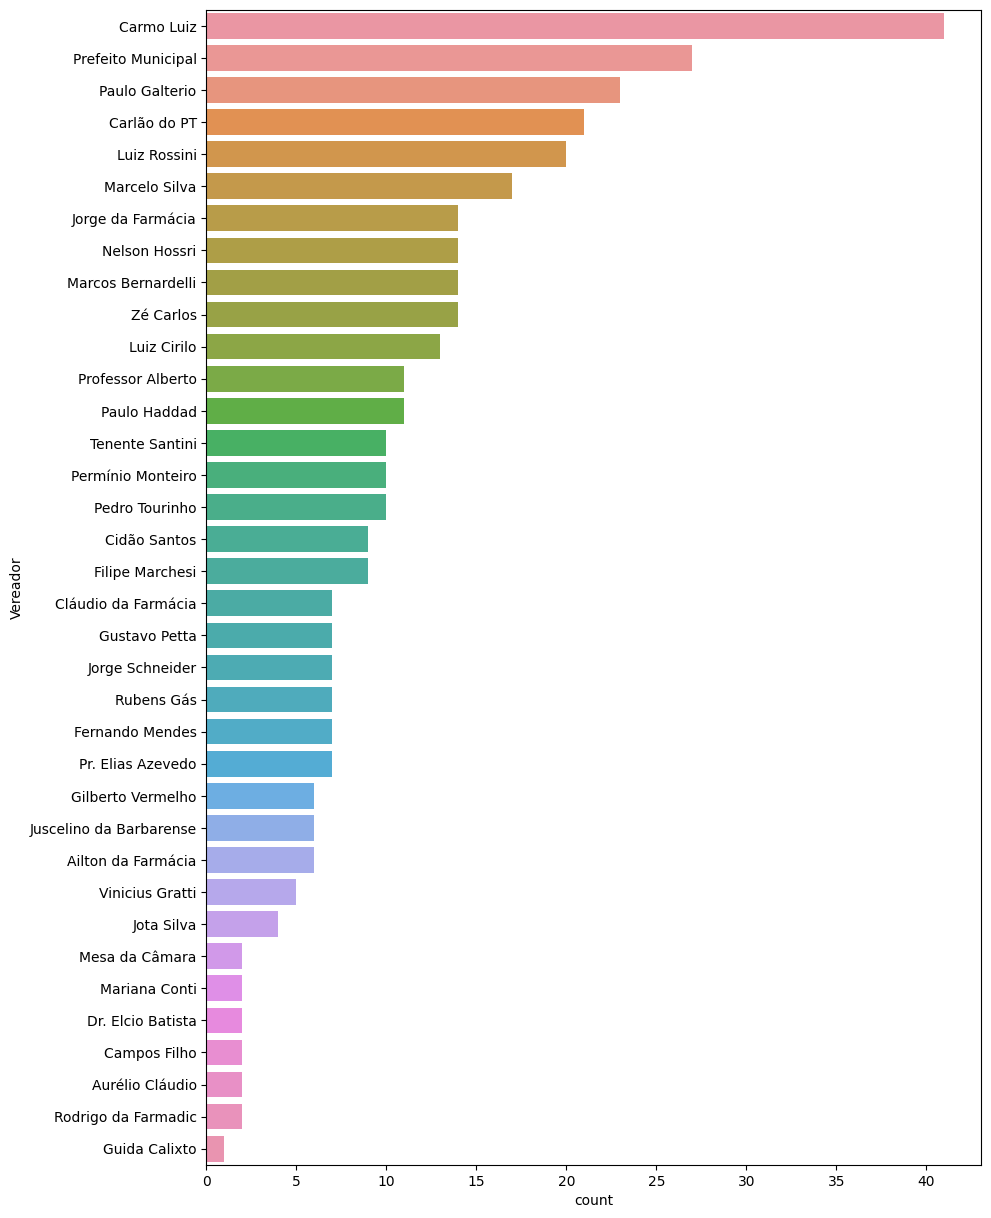

In [13]:
order = df['Vereador'].value_counts().index

plt.figure(figsize=(10,15))
sns.countplot(data=df, y='Vereador', order=order)

Pode-se observar quais vereadores apresentaram mais PLOs

In [14]:
df['Partido'].value_counts()

Partido
PSC         55
PSB         55
PSDB        47
PSD         33
PT          32
PV          30
Prefeito    27
PR          20
PTN         14
PPS         11
PROS         9
PP           8
PRB          7
PC do B      7
PTB          7
DEM          2
PMB          2
PSOL         2
Câmara       2
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Partido'>

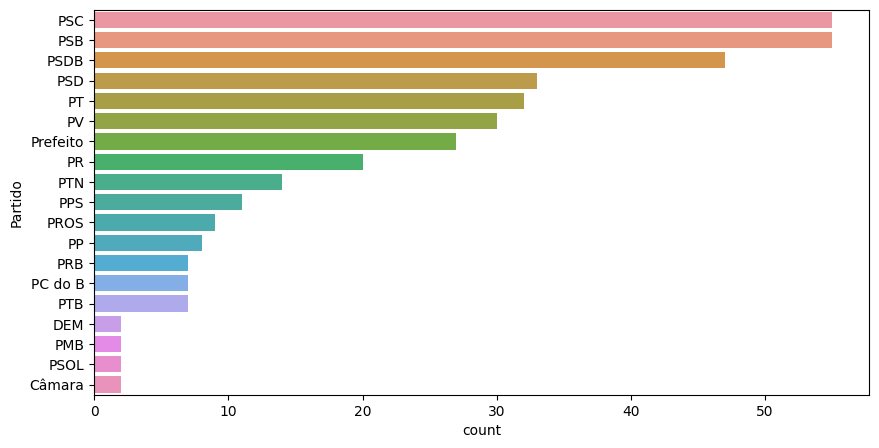

In [15]:
order = df['Partido'].value_counts().index

plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Partido', order=order)

Pode-se observar quais partidos apresentaram mais PLOs

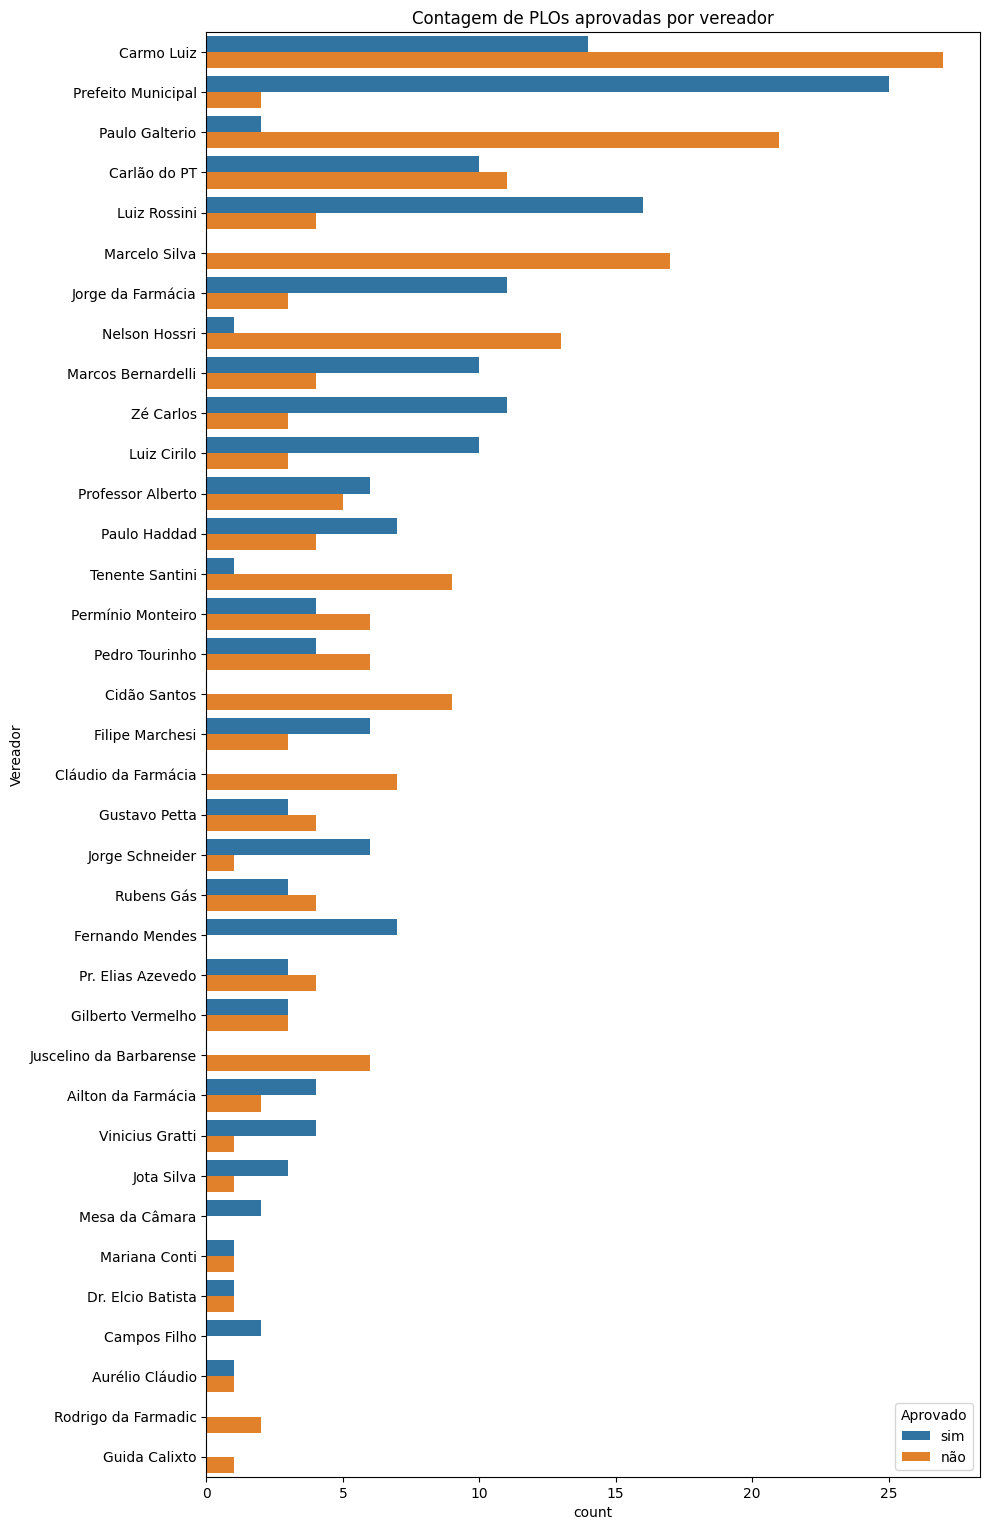

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
order = df['Vereador'].value_counts().index
plt.figure(figsize=(10, 30))

plt.subplot(2, 1, 2)
sns.countplot(data=df, y='Vereador', hue='Aprovado', order=order)
plt.title('Contagem de PLOs aprovadas por vereador')

plt.tight_layout()
plt.show()


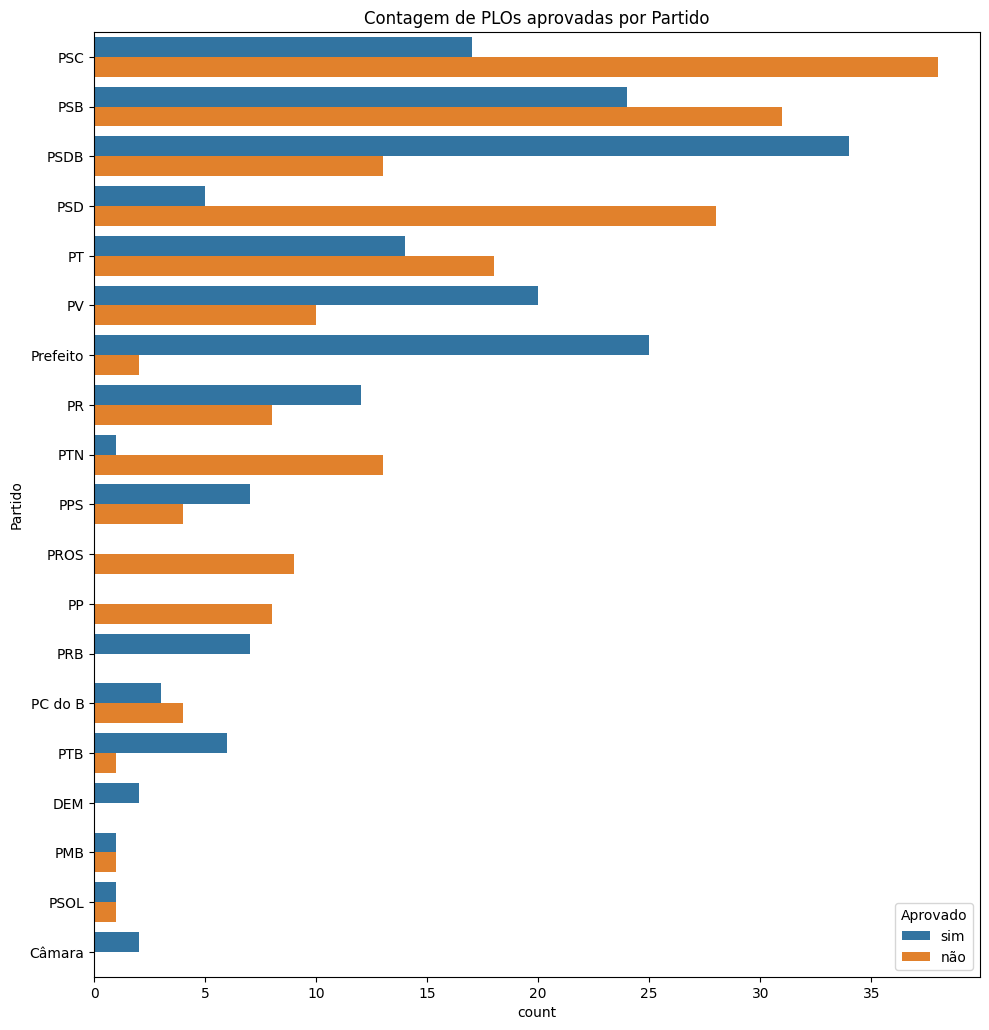

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
order = df['Partido'].value_counts().index
plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
sns.countplot(data=df, y='Partido', hue='Aprovado', order=order)
plt.title('Contagem de PLOs aprovadas por Partido')
plt.tight_layout()
plt.show()


Pode-se ter uma noção de quais vereadores e partidos conseguem mais aprovação de PLos

##### Label Classes

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df['Aprovado'])

LabelEncoder()

In [19]:
print(f'Class labels')

for label, class_ in enumerate(label_encoder.classes_):
    print(f'{class_} ==> {label}')

Class labels
não ==> 0
sim ==> 1


In [20]:
df['Label'] = label_encoder.transform(df['Aprovado'])

In [21]:
df.head()

,Vereador,Partido,Aprovado,Ementa,Texto,Label
0,Ailton da Farmácia,PSD,sim,DECLARA ÓRGÃO DE UTILIDADE PÚBLICA MUNICIPAL A ADRA - NÚCLEO PROFA. CÁSSIA RODRIGUES LASCA.,"Art. I Q Fica declarada órgão de utilidade pública municipal a ADRA — Núcleo Profa. Cássia Rodrigues Lasca, situada no município de Campinas e inscrita no Cadastro Nacional da Pessoa Jurídica - CNP] sob o número 15.355.260/0025-24.",1
1,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ZILDA MELLO SMILGYS UMA PRAÇA PÚBLICA DO MUNICÍPIO DE CAMPINAS.,"Art. I P Fica denominada Praça Zilda Mello Smilgys a Praça 09 (Quarteirão 16.703, Código\nCartográfico 3441.5461.0001, com área de 560,00m 2 ) do loteamento Jardim dos Oliveiras — 3? Parte, situada entre a Rua Luiz Mariano Bueno (Rua 12) e a Rua Waldormiro Gonzaga Silva (Rua 14), no mesmo loteamento.",1
2,Ailton da Farmácia,PSD,sim,DENOMINA RUA JOSÉ LATARO UMA VIA PÚBLICA DO MUNICÍPIO DE CAMPINAS.,"Art. 10 Fica denominada Rua José Lataro a Rua 01 do Io eamento Parque Residencial Caiapó, com início na divisa do loteamento com o Jardim Carlos Lourenço, junto à Rua Monsenhor Antonio Mariano da Silva Cam rgo, e término na Avenida das Andorinhas, junto à divisa do Jardim Itayú",1
3,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ROBERTO ANGELO CASTELLO UMA ÁREA PÚBLICA DO MUNICÍPIO DE CAMPINAS.,"Art. 1 0 Fica denominada Praça Roberto Angelo Castello a ár a pertencente ao Quarteirão 10.841 (formada pelo remanescente da Praça 01 0 loteamento Vila Alberto Simões, de Código Cartográfico 3442.4121.0040, e pelo remanescente da\nPraça 01 do loteamento Vila Antônio Francisco, de Cófjigo Cartográfico 3442.4121.0158), situada entre a Rua Júlio Pereira Brum, a Rua Piccolotto, a Rua Antonieta Quattrer Serra e via sem designação, em ambos os loteamentos.",1
4,Ailton da Farmácia,PSD,não,DISPÕE SOBRE A GRATUIDADE POR ATÉ DUAS HORAS DE ESTACIONAMENTO NOS ESPAÇOS PÚBLICOS DO MUNICÍPIO CONCEDIDOS OU NÃO À INCIATIVA PRIVADA ÀS PESSOAS COM 60 ANOS OU MAIS E AOS DEFICIENTES.,"Art. 1 0 Institui a gratuidade por até duas horas de estacionamento nos espaços públicos do município de Campinas, concedidos ou não à iniciativa privada por tempo determinado, às pessoas com 60 anos ou mais e aos deficientes.\nParágrafo Único A gratuidade de que trata o caput será concedida mediante a apresentação da credencial de estacionamento para vagas especiais emitida exclusivamente pela Empresa Municipal de Desenvolvimento de Campinas - EMDEC.\nArt. 20 A demarcação das vagas de estacionamento exclusivas para idosos a partir dos 60 anos será de responsabilidade do órgão municipal no espaço público adequado ou àquele concedido à iniciativa privada.\nArt. 30 Idosos e deficientes poderão estacionar em vagas comuns em caso de as demarcadas estarem ocupadas.\nArt 40 As despesas decorrentes da execução desta Lei ocorrerão por conta de dotações orçamentárias próprias, suplementadas se necessário.",0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Vereador  370 non-null    object
 1   Partido   370 non-null    object
 2   Aprovado  370 non-null    object
 3   Ementa    370 non-null    object
 4   Texto     370 non-null    object
 5   Label     370 non-null    int32 
dtypes: int32(1), object(5)
memory usage: 16.0+ KB


### 2. Pré-Processamento de texto: 

##### Remoção inicial de algumas das palavras irrelevantes, lemmatizaton, nos dados de texto, utilizando a bilioteca SpaCy

In [23]:
!pip install spacy
# PLOs são em português 
!python -m spacy download pt_core_news_sm  # Portuguese

ERROR: Invalid requirement: '#'


In [24]:
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
from spacy.lang.pt import Portuguese
nlp = Portuguese()

In [25]:
nlp_spacy = spacy.load("pt_core_news_sm")   # Portuguese small vocabulary

In [26]:
def remove_stopwords(doc: spacy.tokens.doc.Doc) -> list:
    tokens_without_stopwords = [token.text for token in doc if not token.is_stop]
    text_without_stopwords = ' '.join(tokens_without_stopwords)
    return text_without_stopwords

In [27]:
import re
def process_text(texts):
    final_text_list=[]
    for sent in texts:
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.sub('[^\w\s]', '', sent)  # Remove punctuations
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        filtered_sentence=[]
        sent1 = nlp(sent)
        sent2 = remove_stopwords(sent1)
        filtered_sentence.append(sent2)
        final_string = " ".join(filtered_sentence) # Final string of cleaned words
        final_text_list.append(final_string)
    return final_text_list

In [28]:
df

,Vereador,Partido,Aprovado,Ementa,Texto,Label
0,Ailton da Farmácia,PSD,sim,DECLARA ÓRGÃO DE UTILIDADE PÚBLICA MUNICIPAL A ADRA - NÚCLEO PROFA. CÁSSIA RODRIGUES LASCA.,"Art. I Q Fica declarada órgão de utilidade pública municipal a ADRA — Núcleo Profa. Cássia Rodrigues Lasca, situada no município de Campinas e inscrita no Cadastro Nacional da Pessoa Jurídica - CNP] sob o número 15.355.260/0025-24.",1
1,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ZILDA MELLO SMILGYS UMA PRAÇA PÚBLICA DO MUNICÍPIO DE CAMPINAS.,"Art. I P Fica denominada Praça Zilda Mello Smilgys a Praça 09 (Quarteirão 16.703, Código\nCartográfico 3441.5461.0001, com área de 560,00m 2 ) do loteamento Jardim dos Oliveiras — 3? Parte, situada entre a Rua Luiz Mariano Bueno (Rua 12) e a Rua Waldormiro Gonzaga Silva (Rua 14), no mesmo loteamento.",1
2,Ailton da Farmácia,PSD,sim,DENOMINA RUA JOSÉ LATARO UMA VIA PÚBLICA DO MUNICÍPIO DE CAMPINAS.,"Art. 10 Fica denominada Rua José Lataro a Rua 01 do Io eamento Parque Residencial Caiapó, com início na divisa do loteamento com o Jardim Carlos Lourenço, junto à Rua Monsenhor Antonio Mariano da Silva Cam rgo, e término na Avenida das Andorinhas, junto à divisa do Jardim Itayú",1
3,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ROBERTO ANGELO CASTELLO UMA ÁREA PÚBLICA DO MUNICÍPIO DE CAMPINAS.,"Art. 1 0 Fica denominada Praça Roberto Angelo Castello a ár a pertencente ao Quarteirão 10.841 (formada pelo remanescente da Praça 01 0 loteamento Vila Alberto Simões, de Código Cartográfico 3442.4121.0040, e pelo remanescente da\nPraça 01 do loteamento Vila Antônio Francisco, de Cófjigo Cartográfico 3442.4121.0158), situada entre a Rua Júlio Pereira Brum, a Rua Piccolotto, a Rua Antonieta Quattrer Serra e via sem designação, em ambos os loteamentos.",1
4,Ailton da Farmácia,PSD,não,DISPÕE SOBRE A GRATUIDADE POR ATÉ DUAS HORAS DE ESTACIONAMENTO NOS ESPAÇOS PÚBLICOS DO MUNICÍPIO CONCEDIDOS OU NÃO À INCIATIVA PRIVADA ÀS PESSOAS COM 60 ANOS OU MAIS E AOS DEFICIENTES.,"Art. 1 0 Institui a gratuidade por até duas horas de estacionamento nos espaços públicos do município de Campinas, concedidos ou não à iniciativa privada por tempo determinado, às pessoas com 60 anos ou mais e aos deficientes.\nParágrafo Único A gratuidade de que trata o caput será concedida mediante a apresentação da credencial de estacionamento para vagas especiais emitida exclusivamente pela Empresa Municipal de Desenvolvimento de Campinas - EMDEC.\nArt. 20 A demarcação das vagas de estacionamento exclusivas para idosos a partir dos 60 anos será de responsabilidade do órgão municipal no espaço público adequado ou àquele concedido à iniciativa privada.\nArt. 30 Idosos e deficientes poderão estacionar em vagas comuns em caso de as demarcadas estarem ocupadas.\nArt 40 As despesas decorrentes da execução desta Lei ocorrerão por conta de dotações orçamentárias próprias, suplementadas se necessário.",0
...,...,...,...,...,...,...
365,Zé Carlos,PSB,sim,INSTITUI A SEMANA DOS ESPORTES ELETRÔNICOS PLAY HARD NO ÂMBITO DO MUNICÍPIO DE CAMPINAS E DÁ OUTRAS PROVIDÊNCIAS.,"Art. I P Fica instituída a Semana dos Esportes Eletrônicos Play Hard no âmbito do município de Campinas, a ser comemorada na segunda semana do mês de junho.\nArt. 2 2 São objetivos da Semana dos Esportes Eletrônicos Play Hard:\n promoção de palestras nas escolas, eventos e atividades educativas com foco na conscientização e popularização dos esportes eletrônicos — e-sports;\nII - veiculação de campanhas de mídias, colocando-se à disposição da população informações em sites, banners, fôlderes e outros materiais ilustrativos e exemplificativos sobre os benefícios relacionados aos esportes eletrônicos — e-sports.\nParágrafo único. As atividades descritas neste artigo poderão ser realizadas, de forma facultativa, pela sociedade civil, bem como pela iniciativa privada.\nArt. 3 2 A Semana dos Esportes Eletrônicos Play Hard integrará o calendário oficial de Campinas.\nArt. 4 2 0 Município poderá regulamentar esta Lei no que couber.",1

In [29]:
print('Processand a coluna Texto')
df['Texto'] = process_text(df['Texto'].tolist())

Processand a coluna Texto


In [30]:
print('Processando a coluna Ementa')
df['Ementa'] = process_text(df['Ementa'].tolist())

Processando a coluna Ementa


In [31]:
df

,Vereador,Partido,Aprovado,Ementa,Texto,Label
0,Ailton da Farmácia,PSD,sim,declara órgão utilidade pública municipal adra núcleo profa cássia rodrigues lasca,art i q fica declarada órgão utilidade pública municipal adra núcleo profa cássia rodrigues lasca situada município campinas inscrita cadastro nacional pessoa jurídica cnp 15355260002524,1
1,Ailton da Farmácia,PSD,sim,denomina praça zilda mello smilgys praça pública município campinas,art i p fica denominada praça zilda mello smilgys praça 09 quarteirão 16703 código cartográfico 344154610001 56000 m 2 loteamento jardim oliveiras 3 situada rua luiz mariano bueno rua 12 rua waldormiro gonzaga silva rua 14 loteamento,1
2,Ailton da Farmácia,PSD,sim,denomina rua josé lataro via pública município campinas,art 10 fica denominada rua josé lataro rua 01 io eamento parque residencial caiapó início divisa loteamento jardim carlos lourenço junto rua monsenhor antonio mariano silva cam rgo término avenida andorinhas junto divisa jardim itayú,1
3,Ailton da Farmácia,PSD,sim,denomina praça roberto angelo castello pública município campinas,art 1 0 fica denominada praça roberto angelo castello ár pertencente quarteirão 10841 formada remanescente praça 01 0 loteamento vila alberto simões código cartográfico 344241210040 remanescente praça 01 loteamento vila antônio francisco cófjigo cartográfico 344241210158 situada rua júlio pereira brum rua piccolotto rua antonieta quattrer serra via designação loteamentos,1
4,Ailton da Farmácia,PSD,não,dispõe gratuidade horas estacionamento espaços públicos município concedidos inciativa privada pessoas 60 anos deficientes,art 1 0 institui gratuidade horas estacionamento espaços públicos município campinas concedidos iniciativa privada determinado pessoas 60 anos deficientes parágrafo único gratuidade trata caput será concedida mediante apresentação credencial estacionamento vagas especiais emitida exclusivamente empresa municipal desenvolvimento campinas emdec art 20 demarcação vagas estacionamento exclusivas idosos 60 anos será responsabilidade órgão municipal espaço público adequado àquele concedido iniciativa privada art 30 idosos deficientes poderão estacionar vagas comuns caso demarcadas estarem ocupadas art 40 despesas decorrentes execução lei ocorrerão conta dotações orçamentárias próprias suplementadas necessário,0
...,...,...,...,...,...,...
365,Zé Carlos,PSB,sim,institui semana esportes eletrônicos play hard âmbito município campinas providências,art i p fica instituída semana esportes eletrônicos play hard âmbito município campinas comemorada semana junho art 2 2 objetivos semana esportes eletrônicos play hard promoção palestras escolas eventos atividades educativas foco conscientização popularização esportes eletrônicos esports ii veiculação campanhas mídias colocandose disposição população informações sites banners fôlderes materiais ilustrativos exemplificativos benefícios relacionados esportes eletrônicos esports parágrafo único atividades descritas artigo poderão realizadas facultativa sociedade civil iniciativa privada art 3 2 semana esportes eletrônicos play hard integrará calendário oficial campinas art 4 2 0 município regulamentar lei couber,1
366,Zé Carlos,PSB,sim,denomina praça antonio alexandre sobrinho recreio município campinas,art 1 0 fica denominado praça antonio alexandre sobrinho recreio 08 quarteirão 3651 código cartográfico 343151320101 136250m2 loteamento vila perseu leite barros situado rua manaus rua 16 avenida presidente juscelino loteamento,1
367,Zé Carlos,PSB,não,dispõe parcelamento imposto transmissão bens imóveis itbi instituído lei nº 12391 20 outubro 2005 providências,art 10 critério secretaria municipal finanças concedida opção pagamento parcelado créditos fiscais referentes imposto transmissão bens imóveis it bi 12 parcelas mensais sucessivas s 1 0 0 parcelamento concedido contribuinte implicará reconhecimento procedência crédito concordância base cálculo adotada s 2 0 0 parcela inferior 50 cinquenta unidades 

##### Divisão dos dados para treinamento e teste

In [32]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Label'], random_state=42)

In [33]:
print(f"===> TRAIN\n{df_train['Label'].value_counts() / df_train.shape[0]}\n")
print(f"===> TEST\n{df_test['Label'].value_counts() / df_test.shape[0]}")

===> TRAIN
Label
0    0.510135
1    0.489865
Name: count, dtype: float64

===> TEST
Label
0    0.513514
1    0.486486
Name: count, dtype: float64


In [34]:
# save the datasets
df_train.to_csv('test_dataset_train.csv', sep=';', index = False)
df_test.to_csv('test_dataset_test.csv', sep=';', index = False)

In [35]:
df_train

,Vereador,Partido,Aprovado,Ementa,Texto,Label
236,Paulo Galterio,PSB,não,denomina centro saúde zenir thiélfalo centro saúde município campinas,art 1 fica denominado centro saúde zenir thiélfalo centro saúde bairro vila rica localizado rua manganês 126 art 2 lei entra vigor data publicação,0
125,Jorge da Farmácia,PSDB,sim,inclui dia municipal braille calendário oficial município celebrado anualmente dia 8 abril,art i p fica incluído dia municipal braille calendário oficial município celebrado anualmente dia 8 abril art 2 2 dia municipal braille setores público privado poderão realizar eventos destinados reverenciar memória louis braille divulgando destacando importância braille educação habilitação reabilitação profissionalização pessoa cega ações i fortaleçam debate social direitos pessoa cega plena integração sociedade ii promovam inserção pessoa cega mercado trabalho iii difundam orientações prevenção cegueira iv difundam informações acessibilidade material pessoa cega informação comunicação aplicação tecnologias v incentivem produção textos braille vi promovam capacitação profissionais atuar educação habilitação reabilitação pessoa cega editoração textos braille,1
320,Prefeito Municipal,Prefeito,sim,institui museu paz centro educação memória estudos cultura afrobrasileira,câmara municipal aprovou prefeito município campinas sanciono promulgo seguinte lei art 1 2 fica instituído museu paz centro educação memória estudos cultura afrobrasileira sediados casa sede antigo engenho fazenda mato entorno parque ecológico monsenhor emílio josé salim situado rodovia heitor penteado km 3 vila brandina município campinassp art 2 2 0 museu paz centro educação memória estudos cultura afrobrasileira serão vinculados secretaria municipal assistência social pessoa deficiência direitos humanos atuará estreita articulação colaboração secretaria municipal cultura art 3 2 0 museu paz centro educação memória estudos cultura afrobrasileira terão objetivos realizar difusão princípios cultura paz direitos humanos foco principal transversal relações étnicoraciais história afrodescendente ii promoção preservação divulgação conservação patrimônio cultural afrobrasileiro iii investigação memórias história cultura comunidade negra campinas iv contribuir desconstrução preconceitos estereótipos combate racismo discriminação racial v preservação ambiente art 42 0 acervo museu paz centro educação memória estudos cultura afrobrasileira será constituído bens materiais bens imateriais s 1 2 entendese bens materiais bens móveis objetos utilitários documentos arquivísticos iconográficos fotografias bens imóveis casarão entorno construído s 2 2 entendese bens imateriais tradições técnicas humanos polir esculpir construir cozinhar tecer pintar patrimônio intelectual expressões sentimento individual coletivo histórias vida manifestações folclóricas religiosas música literatura contação histórias patrimônio emocional art 5 2 0 museu paz centro educação memória estudos cultura afrobrasileira terão exposições permanentes temporárias permitindo acervo seja objeto exposição itinerante locais cidade art 6 2 acervo imaterial museu paz centro educação memória estudos cultura afrobrasileira será produzido organização nações unidas educação ciência cultura unesco representação brasil será doado município campinas art 7 2 sustentabilidade financeira museu paz centro educação memória estudos cultura afrobrasileira constituição acervo histórico instalação manutenção desenvolvimento atividades poderão promovidas celebração convênios termos cooperação chamamentos públicos instrumentos congêneres entidades públicas privadas instituições ensino públicas privadas pessoas físicas jurídicas organizações gestoras fundos patrimoniais constituídos termos lei federal 13800 4 janeiro 2019 art 8 2 procedimentos recebimento guarda acervo museu paz centro educação memória estudos cultura afrobrasileira poderão estabelecidos regulamento art 9 2 será instituído regulamento trabalho composto repr

In [36]:
df_test

,Vereador,Partido,Aprovado,Ementa,Texto,Label
178,Luiz Rossini,PV,sim,inclui calendário oficial município campinas semana prevenção febre maculosa brasileira providências,art 1 2 fica incluída calendário oficial município campinas semana prevenção febre maculosa brasileira realizada anualmente semana junho parágrafo único semana mencionada caput artigo objetivo conscientizar população formas prevenção combate carrapatoestrela principal transmissor febre maculosa art 2 2 durante semana prevenção febre maculosa brasileira público órgãos competentes promover apoiar realização ação combate carrapatoestrela palestras campanhas educativas tema principalmente escolas art 3 2 consecução lei fica executivo municipal autorizado firmar termo convênio parceria entidades públicas privadas setor art 4 2 0 executivo regulamentará lei couber art 5 2 despesas decorrentes aplicação lei correrão conta verbas próprias orçamentárias suplementadas necessário,1
111,Gilberto Vermelho,PSDB,não,dispõe desembarque mulheres idosos pessoas deficiência mobilidade reduzida usuários transporte coletivo urbano passageiros cidade campinas providências,art 1 0 fica autorizado desembarque mulheres idosos pessoas deficiência mobilidade reduzida usuários transporte coletivo urbano passageiros cidade campinas diverso parada regulares período 22 horas 05 horas dia seguinte solicitado art 20 veículos vinculados transporte coletivo urbano passageiros cidade campinas poderão parar parada preestabelecidos desembarque mulheres pessoas idosas maiores 60 anos pessoas deficiência mobilidade reduzida horário operação noturna 22h 5h dia seguinte dias úteis feriados finais semanas parágrafo único autorização trata caput artigo estenderseá pessoas estiverem acompanhando mulheres idosos conquanto desembarquem conjunta simultaneamente mulher idoso pessoas deficiência mobilidade reduzida usuários previamente solicitado operador art 30 fins lei considerada identidade gênero autodeclarada independentemente constar documento registro público sendo permitido desembarque travestis mulheres transexuais art 40 comprovação idade mínima necessária 60 anos idade bastará apresentação documento válido foto bilhete único especial idoso parágrafo único bilhete único especial idoso pessoal intransferível devendo apresentado solicitado operador fiscalização caso constatação uso indevido será retido cancelado art 50 será autorizado desembarque preestabelecidos conforme previsto artigo 2 0 decreto seguintes casos i parcelas itinerário ocorram corredores exclusivos ônibus esquerda viário ii viadutos pontes túneis art 60 parada desembarque ocorrer obedeça itinerários determinados secretaria municipal transportes emdec empresa municipal desenvolvimento campinas art 70 motoristas veículos coletivos poderão realizar operação desembarque locais seja proibida parada veículos haja espaço suficiente correto acostamento coletivo observando zelando segurança usuários ocupantes via art 80 usuários desejarem desembarcar parada preestabelecidos deverão previamente solicitar motoristas ônibus antecedência mínima necessária regras segurança trânsito previstas código brasileiro trânsito possam cumpridas n parágrafo único motoristas deverão analisar adequabilidade parada informando usuário solicitação atendida propor oferecer alternativa adequada caso exista algum motivo impeditivo art 9 0 despesas decorrentes lei correrão conta dotações orçamentárias próprias suplementadas necessário art 10 0 0 executivo regulamentará lei couber prazo 60 sessenta dias contar data publicação,0
362,Zé Carlos,PSB,sim,denomina rua josé hyppolito ferreira via pública município campinas,art 1 0 fica denominada rua josé hyppolito ferreira rua 22 loteamento parque valença continuação 1 rua dr alcides freitas leitão rua 04 rua leandro gonçalves rua oi praça paulo buzan ramos praça 02 loteamento,1
43,Carmo Luiz,PSC,não,dispõe obrigatoriedade cartórios município campinas aceitarem pagamento taxas seja realizado cartões débito,art 1 2 tornase 

##### Nova remoção na coluna 'Texto' usando biblioteca neattext
- lowering, expand contractions
- remove:
  + punctuations, stop words, urls, emails, numbers, emojis, phone numbers, multiple whitespaces, currency symbols, special characters

In [37]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [38]:
import neattext.functions as ntx

def text_preprocessing(text_in: str) -> str:
    text = text_in.lower()
    text = ntx.fix_contractions(text)
    text = ntx.remove_punctuations(text)
    text = ntx.remove_stopwords(text)
    text = ntx.remove_urls(text)
    text = ntx.remove_emails(text)
    text = ntx.remove_numbers(text)
    text = ntx.remove_emojis(text)
    text = ntx.remove_phone_numbers(text)
    text = ntx.remove_multiple_spaces(text)
    text = ntx.remove_currency_symbols(text)
    text = ntx.remove_special_characters(text)
    return text

In [39]:
# progress bar in pandas
!pip install tqdm

In [40]:
from tqdm import tqdm
tqdm.pandas()  # it enables some new progress bar functions/methods for pandas

In [41]:
# pre-process the training set
df_train['Texto-pre'] = df_train['Texto'].progress_apply(lambda text: text_preprocessing(text))

100%|███████████████████████████████████████████████████████████████████████████████| 296/296 [00:01<00:00, 292.67it/s]


In [42]:
df_train.head()

,Vereador,Partido,Aprovado,Ementa,Texto,Label,Texto-pre
236,Paulo Galterio,PSB,não,denomina centro saúde zenir thiélfalo centro saúde município campinas,art 1 fica denominado centro saúde zenir thiélfalo centro saúde bairro vila rica localizado rua manganês 126 art 2 lei entra vigor data publicação,0,art fica denominado centro sade zenir thilfalo centro sade bairro vila rica localizado rua mangans art lei entra vigor data publicao
125,Jorge da Farmácia,PSDB,sim,inclui dia municipal braille calendário oficial município celebrado anualmente dia 8 abril,art i p fica incluído dia municipal braille calendário oficial município celebrado anualmente dia 8 abril art 2 2 dia municipal braille setores público privado poderão realizar eventos destinados reverenciar memória louis braille divulgando destacando importância braille educação habilitação reabilitação profissionalização pessoa cega ações i fortaleçam debate social direitos pessoa cega plena integração sociedade ii promovam inserção pessoa cega mercado trabalho iii difundam orientações prevenção cegueira iv difundam informações acessibilidade material pessoa cega informação comunicação aplicação tecnologias v incentivem produção textos braille vi promovam capacitação profissionais atuar educação habilitação reabilitação pessoa cega editoração textos braille,1,art p fica includo dia municipal braille calendrio oficial municpio celebrado anualmente dia abril art dia municipal braille setores pblico privado podero realizar eventos destinados reverenciar memria louis braille divulgando destacando importncia braille educao habilitao reabilitao profissionalizao pessoa cega aes fortaleam debate social direitos pessoa cega plena integrao sociedade ii promovam insero pessoa cega mercado trabalho iii difundam orientaes preveno cegueira iv difundam informaes acessibilidade material pessoa cega informao comunicao aplicao tecnologias v incentivem produo textos braille vi promovam capacitao profissionais atuar educao habilitao reabilitao pessoa cega editorao textos braille
320,Prefeito Municipal,Prefeito,sim,institui museu paz centro educação memória estudos cultura afrobrasileira,câmara municipal aprovou prefeito município campinas sanciono promulgo seguinte lei art 1 2 fica instituído museu paz centro educação memória estudos cultura afrobrasileira sediados casa sede antigo engenho fazenda mato entorno parque ecológico monsenhor emílio josé salim situado rodovia heitor penteado km 3 vila brandina município campinassp art 2 2 0 museu paz centro educação memória estudos cultura afrobrasileira serão vinculados secretaria municipal assistência social pessoa deficiência direitos humanos atuará estreita articulação colaboração secretaria municipal cultura art 3 2 0 museu paz centro educação memória estudos cultura afrobrasileira terão objetivos realizar difusão princípios cultura paz direitos humanos foco principal transversal relações étnicoraciais história afrodescendente ii promoção preservação divulgação conservação patrimônio cultural afrobrasileiro iii investigação memórias história cultura comunidade negra campinas iv contribuir desconstrução preconceitos estereótipos combate racismo discriminação racial v preservação ambiente art 42 0 acervo museu paz centro educação memória estudos cultura afrobrasileira será constituído bens materiais bens imateriais s 1 2 entendese bens materiais bens móveis objetos utilitários documentos arquivísticos iconográficos fotografias bens imóveis casarão entorno construído s 2 2 entendese bens imateriais tradições técnicas humanos polir esculpir construir cozinhar tecer pintar patrimônio intelectual expressões sentimento individual coletivo histórias vida manifestações folclóricas religiosas música literatura contação histórias patrimônio emocional art 5 2 0 museu paz centro educação memória estudos cultura afrobrasileira terão exposições permanentes temporárias permitindo acervo seja objeto exposição itinerante locais cidade art 6 2 acervo imaterial museu p

In [43]:
# pre-process the training set
df_test['Texto-pre'] = df_test['Texto'].progress_apply(lambda text: text_preprocessing(text))

100%|█████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 440.75it/s]


In [44]:
df_test.head()

,Vereador,Partido,Aprovado,Ementa,Texto,Label,Texto-pre
178,Luiz Rossini,PV,sim,inclui calendário oficial município campinas semana prevenção febre maculosa brasileira providências,art 1 2 fica incluída calendário oficial município campinas semana prevenção febre maculosa brasileira realizada anualmente semana junho parágrafo único semana mencionada caput artigo objetivo conscientizar população formas prevenção combate carrapatoestrela principal transmissor febre maculosa art 2 2 durante semana prevenção febre maculosa brasileira público órgãos competentes promover apoiar realização ação combate carrapatoestrela palestras campanhas educativas tema principalmente escolas art 3 2 consecução lei fica executivo municipal autorizado firmar termo convênio parceria entidades públicas privadas setor art 4 2 0 executivo regulamentará lei couber art 5 2 despesas decorrentes aplicação lei correrão conta verbas próprias orçamentárias suplementadas necessário,1,art fica includa calendrio oficial municpio campinas semana preveno febre maculosa brasileira realizada anualmente semana junho pargrafo nico semana mencionada caput artigo objetivo conscientizar populao formas preveno combate carrapatoestrela principal transmissor febre maculosa art durante semana preveno febre maculosa brasileira pblico rgos competentes promover apoiar realizao ao combate carrapatoestrela palestras campanhas educativas tema principalmente escolas art consecuo lei fica executivo municipal autorizado firmar termo convnio parceria entidades pblicas privadas setor art executivo regulamentar lei couber art despesas decorrentes aplicao lei correro conta verbas prprias oramentrias suplementadas necessrio
111,Gilberto Vermelho,PSDB,não,dispõe desembarque mulheres idosos pessoas deficiência mobilidade reduzida usuários transporte coletivo urbano passageiros cidade campinas providências,art 1 0 fica autorizado desembarque mulheres idosos pessoas deficiência mobilidade reduzida usuários transporte coletivo urbano passageiros cidade campinas diverso parada regulares período 22 horas 05 horas dia seguinte solicitado art 20 veículos vinculados transporte coletivo urbano passageiros cidade campinas poderão parar parada preestabelecidos desembarque mulheres pessoas idosas maiores 60 anos pessoas deficiência mobilidade reduzida horário operação noturna 22h 5h dia seguinte dias úteis feriados finais semanas parágrafo único autorização trata caput artigo estenderseá pessoas estiverem acompanhando mulheres idosos conquanto desembarquem conjunta simultaneamente mulher idoso pessoas deficiência mobilidade reduzida usuários previamente solicitado operador art 30 fins lei considerada identidade gênero autodeclarada independentemente constar documento registro público sendo permitido desembarque travestis mulheres transexuais art 40 comprovação idade mínima necessária 60 anos idade bastará apresentação documento válido foto bilhete único especial idoso parágrafo único bilhete único especial idoso pessoal intransferível devendo apresentado solicitado operador fiscalização caso constatação uso indevido será retido cancelado art 50 será autorizado desembarque preestabelecidos conforme previsto artigo 2 0 decreto seguintes casos i parcelas itinerário ocorram corredores exclusivos ônibus esquerda viário ii viadutos pontes túneis art 60 parada desembarque ocorrer obedeça itinerários determinados secretaria municipal transportes emdec empresa municipal desenvolvimento campinas art 70 motoristas veículos coletivos poderão realizar operação desembarque locais seja proibida parada veículos haja espaço suficiente correto acostamento coletivo observando zelando segurança usuários ocupantes via art 80 usuários desejarem desembarcar parada preestabelecidos deverão previamente solicitar motoristas ônibus antecedência mínima necessária regras segurança trânsito previstas código brasileiro trânsito possam cumpridas n parágrafo único motoristas deverão analisar adequabilidade parada informando usuário soli

In [45]:
# save the preprocessed datasets
df_train.to_csv('test_dataset_train_preprocessed.csv', sep=';', index=False)
df_test.to_csv('test_dataset_test_preprocessed.csv', sep=';', index=False)

# Carregar o arquivo de treinamento
#df_train = pd.read_csv('test_dataset_train_preprocessed.csv', sep=';')
# Carregar o arquivo de teste (descomente se necessário)
#df_test = pd.read_csv('test_dataset_test_preprocessed.csv', sep=';')


In [46]:
# pre-process the training set
df['Texto-pre'] = df['Texto'].progress_apply(lambda text: text_preprocessing(text))

100%|███████████████████████████████████████████████████████████████████████████████| 370/370 [00:00<00:00, 419.76it/s]


In [47]:
df.iloc[3:5]

,Vereador,Partido,Aprovado,Ementa,Texto,Label,Texto-pre
3,Ailton da Farmácia,PSD,sim,denomina praça roberto angelo castello pública município campinas,art 1 0 fica denominada praça roberto angelo castello ár pertencente quarteirão 10841 formada remanescente praça 01 0 loteamento vila alberto simões código cartográfico 344241210040 remanescente praça 01 loteamento vila antônio francisco cófjigo cartográfico 344241210158 situada rua júlio pereira brum rua piccolotto rua antonieta quattrer serra via designação loteamentos,1,art fica denominada praa roberto angelo castello r pertencente quarteiro formada remanescente praa loteamento vila alberto simes cdigo cartogrfico remanescente praa loteamento vila antnio francisco cfjigo cartogrfico situada rua jlio pereira brum rua piccolotto rua antonieta quattrer serra designao loteamentos
4,Ailton da Farmácia,PSD,não,dispõe gratuidade horas estacionamento espaços públicos município concedidos inciativa privada pessoas 60 anos deficientes,art 1 0 institui gratuidade horas estacionamento espaços públicos município campinas concedidos iniciativa privada determinado pessoas 60 anos deficientes parágrafo único gratuidade trata caput será concedida mediante apresentação credencial estacionamento vagas especiais emitida exclusivamente empresa municipal desenvolvimento campinas emdec art 20 demarcação vagas estacionamento exclusivas idosos 60 anos será responsabilidade órgão municipal espaço público adequado àquele concedido iniciativa privada art 30 idosos deficientes poderão estacionar vagas comuns caso demarcadas estarem ocupadas art 40 despesas decorrentes execução lei ocorrerão conta dotações orçamentárias próprias suplementadas necessário,0,art institui gratuidade horas estacionamento espaos pblicos municpio campinas concedidos iniciativa privada determinado pessoas anos deficientes pargrafo nico gratuidade trata caput ser concedida mediante apresentao credencial estacionamento vagas especiais emitida exclusivamente empresa municipal desenvolvimento campinas emdec art demarcao vagas estacionamento exclusivas idosos anos ser responsabilidade rgo municipal espao pblico adequado quele concedido iniciativa privada art idosos deficientes podero estacionar vagas comuns caso demarcadas estarem ocupadas art despesas decorrentes execuo lei ocorrero conta dotaes oramentrias prprias suplementadas necessrio


#### 2.1 Word Cloud for Train Set

In [48]:
# classes/genres
notas = sorted(df_train['Vereador'].unique())
print(notas)

['Ailton da Farmácia', 'Aurélio Cláudio', 'Campos Filho', 'Carlão do PT', 'Carmo Luiz', 'Cidão Santos', 'Cláudio da Farmácia', 'Dr. Elcio Batista', 'Fernando Mendes', 'Filipe Marchesi', 'Gilberto Vermelho', 'Guida Calixto', 'Gustavo Petta', 'Jorge Schneider', 'Jorge da Farmácia', 'Jota Silva', 'Juscelino da Barbarense', 'Luiz Cirilo', 'Luiz Rossini', 'Marcelo Silva', 'Marcos Bernardelli', 'Mariana Conti', 'Mesa da Câmara', 'Nelson Hossri', 'Paulo Galterio', 'Paulo Haddad', 'Pedro Tourinho', 'Permínio Monteiro', 'Pr. Elias Azevedo', 'Prefeito Municipal', 'Professor Alberto', 'Rodrigo da Farmadic', 'Rubens Gás', 'Tenente Santini', 'Vinicius Gratti', 'Zé Carlos']


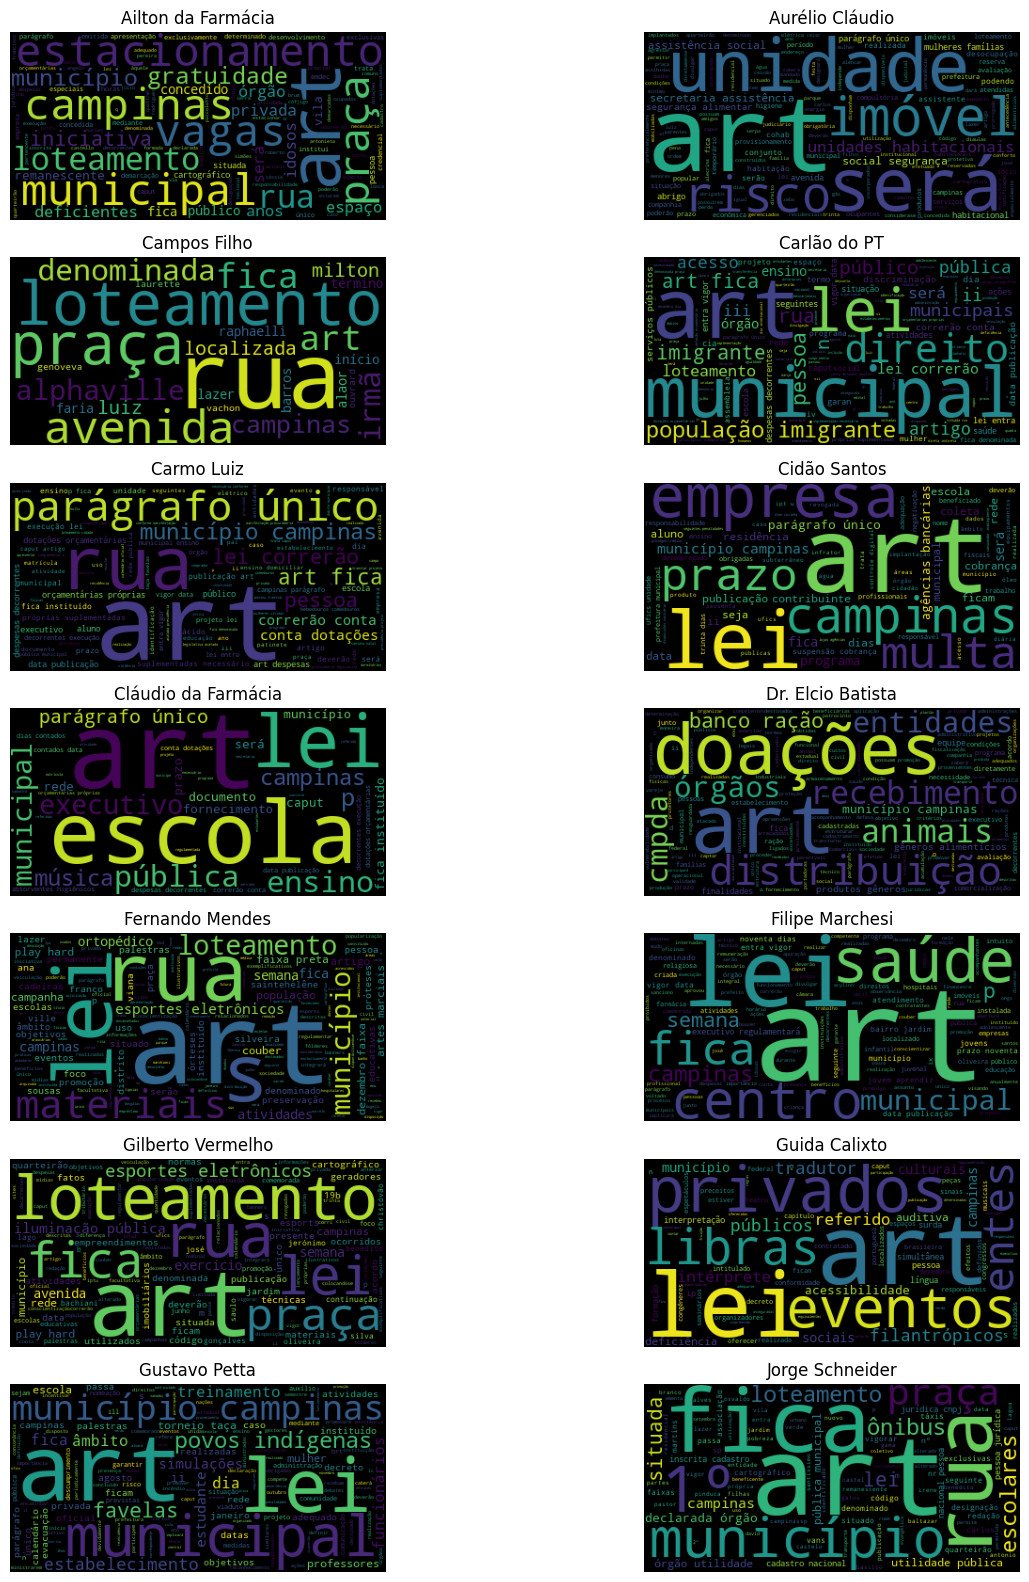

In [49]:
# plot a word cloud for each genre
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig, axes = plt.subplots(7, 2, figsize=(15, 20))
idx = 0
for row in range(7):
    for col in range(2):
        nota = notas[idx]
        
        df_nota = df_train.query("Vereador == @nota")

        text = ' '.join(df_nota['Texto'])
        wordcloud = WordCloud().generate(text)
        axes[row, col].imshow(wordcloud)
        axes[row, col].set_title(f'{nota}')
        axes[row, col].axis('off')

        idx += 1

### 3. Feature Extraction

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(df_train['Texto-pre'])
y_train = df_train['Label']

X_test = tfidf.transform(df_test['Texto-pre'])
y_test = df_test['Label']

In [51]:
X_train.shape, X_test.shape

((296, 5751), (74, 5751))

In [52]:
print(f'Vocabulary size: {len(tfidf.vocabulary_)}')

Vocabulary size: 5751


### 4. Treinamento de modelos

In [53]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', n_jobs=-1)

logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1)

In [54]:
# prediction on training set
y_train_pred = logreg.predict(X_train)

In [55]:
from sklearn.metrics import classification_report

#print(classification_report(y_train, y_train_pred, target_names=target_names))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       151
           1       0.99      0.94      0.96       145

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296



In [56]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average='macro')

print(f'F1 Train: {f1_train}')

F1 Train: 0.9627660182739259


In [57]:
from sklearn.metrics import balanced_accuracy_score

balacc_train = balanced_accuracy_score(y_train, y_train_pred)

print(f'Balanced Acc Train: {balacc_train}')

Balanced Acc Train: 0.9623430006850879


### Comentários sobre os resultados dos testes de classificação
#### Treinamento:

- Precision: 94% dos exemplos previstos como negativos são realmente negativos
- Recall: 99% dos exemplos negativos reais são previstos como negativos
- F1-score: 96% (média harmônica ponderada de precision e recall)
- Accuracy: 96% dos exemplos são previstos corretamente


#### Evaluate the model on the Test Set

In [58]:
# prediction on testing set
y_test_pred = logreg.predict(X_test)

In [59]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.89      0.89      0.89        36

    accuracy                           0.89        74
   macro avg       0.89      0.89      0.89        74
weighted avg       0.89      0.89      0.89        74



In [60]:
from sklearn.metrics import f1_score
f1_test = f1_score(y_test, y_test_pred, average='macro')
print(f'F1 Test: {f1_test}')

F1 Test: 0.8918128654970761


In [61]:
from sklearn.metrics import balanced_accuracy_score

balacc_test = balanced_accuracy_score(y_test, y_test_pred)

print(f'Balanced Acc Test: {balacc_test}')

Balanced Acc Test: 0.8918128654970761


### Comentários sobre os resultados dos testes de classificação
#### Teste:

- Precision: 89% dos exemplos previstos como negativos são realmente negativos- 
Recall: 89% dos exemplos negativos reais são previstos como negativo
- 
F1-score: 89% (média harmônica ponderada de precision e reca
- .
Accuracy: 89% dos exemplos são previstos corretamete.


## Comentário dos resultados:

#### 1.Classificação no conjunto de treinamento:
O modelo de regressão logística alcançou uma precisão de 0,94 para a classe 0 e 0,99 para a classe 1, com uma pontuação F1 de 0,96 para ambas as classes. Isso indica que o modelo é muito bom em prever as classes corretas para os dados de treinamento.

#### 2.Classificação no conjunto de teste:
No conjunto de teste, o modelo de regressão logística alcançou uma precisão de 0,89 para ambas as classes, com uma pontuação F1 de 0,89 para ambas as classes. Isso indica que o modelo também é bom em prever as classes corretas para dados novos que ele nunca viu antes.

### Comparação dos resultados:
Os resultados do modelo de regressão logística são melhores no conjunto de treinamento do que no conjunto de teste. Isso é comum em modelos de machine learning, pois os modelos tendem a se adaptar demais aos dados de treinamento e, portanto, não generalizam bem para novos dados.

No entanto, a queda de desempenho do modelo no conjunto de teste é relativamente pequena, o que indica que o modelo ainda é capaz de generalizar bem para novos dados.

### Conclusão geral:
O modelo de regressão logística obteve bons resultados nos conjuntos de treinamento e de teste, indicando que é um modelo adequado para este problema de classificação.